In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.1


In [3]:
# 60000枚の画像を訓練に， 10000枚の画像をネットワークが学習した画像分類の正確性を評価するのに使用
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
len(train_labels)

60000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

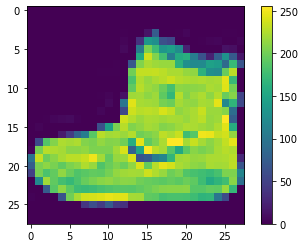

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
# 2値変換
train_images = train_images / 255.0
test_images = test_images / 255.0

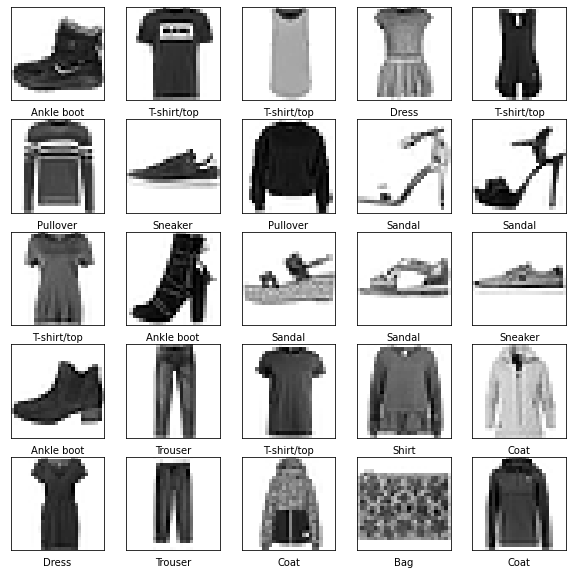

In [14]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
# 層の設定
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # 第一層 1次元配列に変換
    # 密結合または全結合された2つのニューロン層に
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
# モデルのコンパイル
# 損失関数(loss fuction): 訓練中のモデルが不正確であるほど大きな値となる関数．この関数の値が最初化することにより，訓練中のモデルが正しい方向に進む
# オプティマイザ(optimizer): モデルが見ているデータと，損失関数の値から，どのようにモデルを更新するかを決定
# メトリクス(metrics): 訓練とテストのステップを監視するのに使用．
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [19]:
# モデルの訓練
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
   1/1875 [..............................] - ETA: 5:12 - loss: 2.3927 - accuracy: 0.0938

2022-06-02 11:35:05.345883: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 2s 740us/step - loss: 0.4998 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 1s 714us/step - loss: 0.3779 - accuracy: 0.8650
Epoch 3/10
1875/1875 [==============================] - 1s 721us/step - loss: 0.3393 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] - 1s 732us/step - loss: 0.3167 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 1s 797us/step - loss: 0.2985 - accuracy: 0.8891
Epoch 6/10
1875/1875 [==============================] - 1s 707us/step - loss: 0.2832 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 1s 698us/step - loss: 0.2707 - accuracy: 0.8991
Epoch 8/10
1875/1875 [==============================] - 1s 694us/step - loss: 0.2579 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 1s 704us/step - loss: 0.2488 - accuracy: 0.9074
Epoch 10/10
1875/1875 [==============================] - 1s 700us/step - lo

In [21]:
# 正解率の評価
# 訓練用データセットよりも正解率が低い理由は，過学習の影響
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3590 - accuracy: 0.8781 - 149ms/epoch - 475us/step

Test accuracy: 0.8780999779701233


In [26]:
# 予測
predictions = model.predict(test_images)
predictions[0]

array([6.3637217e-06, 1.8874926e-09, 1.4977260e-07, 1.9529567e-10,
       2.1150920e-10, 8.2859434e-03, 2.3703132e-07, 5.7602160e-02,
       5.8139256e-07, 9.3410462e-01], dtype=float32)

In [27]:
# 一番信頼度が高いラベル
np.argmax(predictions[0])

9

In [28]:
test_labels[0]

9

In [33]:
# 10ch全てをグラフ化
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

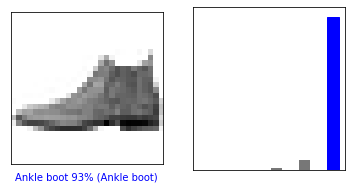

In [34]:
# 0番目の画像と、予測、予測配列
# 正しい予測は青，誤っている予測は赤
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

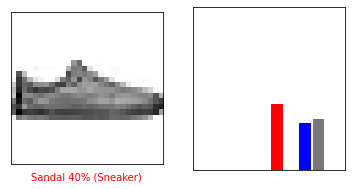

In [35]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

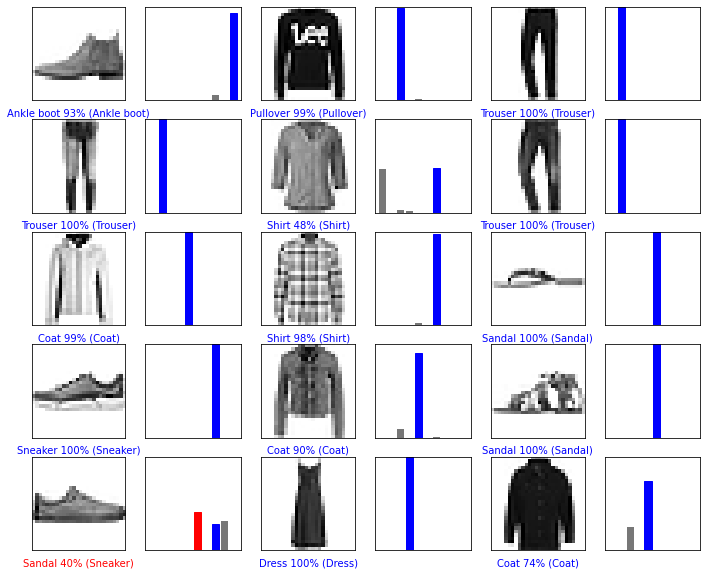

In [37]:
# X個のテスト画像、予測されたラベル、正解ラベルを表示
# 正しい予測は青で、誤った予測は赤で表示
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [38]:
# テスト用データセットから画像を1枚取り出す
img = test_images[0]
print(img.shape)

(28, 28)


In [39]:
# 画像を1枚だけのバッチのメンバーにする
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [40]:
# 予測
predictions_single = model.predict(img)
print(predictions_single)

[[6.3637144e-06 1.8874888e-09 1.4977230e-07 1.9529602e-10 2.1150878e-10
  8.2859257e-03 2.3703082e-07 5.7602178e-02 5.8139136e-07 9.3410450e-01]]


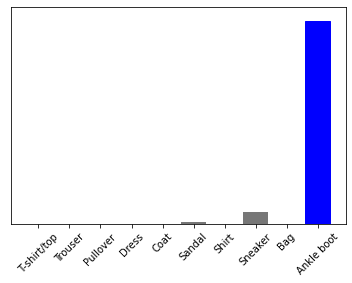

In [41]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [42]:
# リストの要素がどの画像に適しているか
np.argmax(predictions_single[0])

9